# Dataset
- Only human sensors
- Drop all rows with at least one NaN entry (S1-ADL1 S1-ADL2 S1-ADL3 S1-ADL4 S1-ADL5 S1-Drill S2-ADL1 S2-Drill S4-ADL4)
- Segmentation w=24, s=12 results in 17936 train, 3183 validation and 5145 test samples
- Normalize to mean=0.5 variance=1
- Additive noise (mu=0, sigma=0.01)

In [2]:
import matplotlib.pyplot as plt
import incense
from common.helper.config import parseMongoConfig
import pandas as pd
import numpy as np
loader = incense.ExperimentLoader(**parseMongoConfig('./config.ini', adapt='IncenseExperimentLoader'))

# Best Model ($\mathcal{w}F_1$)

wf1 = 0.866
acc = 0.867


<Figure size 640x480 with 0 Axes>

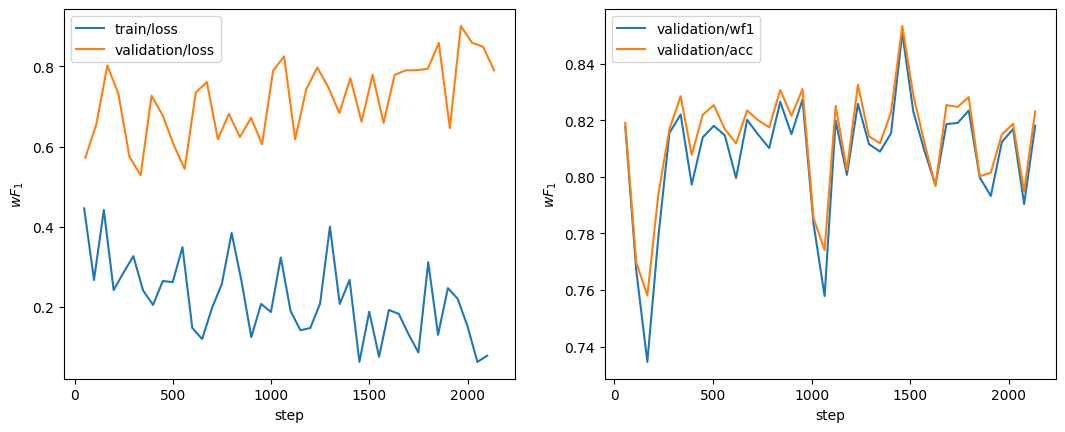

In [29]:
experiments = loader.find_by_name('CNN-IMU_Opportunity-Locomotion')
best_wf1 = max(experiments, key=lambda e: e.metrics['test/wf1'].values.max())

selection_ix = best_wf1.metrics['test/wf1'].argmax()
print(f'wf1 = {best_wf1.metrics["test/wf1"].values[selection_ix]:.03f}')
print(f'acc = {best_wf1.metrics["test/acc"].values[selection_ix]:.03f}')

plt.figure()
fig, ax = plt.subplots(1,2)
fig.set_figwidth(fig.get_figwidth()*2)
best_wf1.metrics['train/loss'].plot(ax=ax[0])
best_wf1.metrics['validation/loss'].plot(ax=ax[0])
best_wf1.metrics['validation/wf1'].plot(ax=ax[1])
best_wf1.metrics['validation/acc'].plot(ax=ax[1])
for a in ax:
  a.legend()
  a.set_ylabel('$wF_1$')
_ = fig.show()